Initialization

In [1]:
import pyscal as pc
import os
import pyscal.traj_process as ptp
import matplotlib.pyplot as plt
import numpy as np
import string
from scipy.io import savemat
import pickle




Read Files

In [2]:
#def calculate_q(file, format="lammps-dump"):
file='postest'
format="poscar"
sys1 = pc.System()
sys1.read_inputfile(file, format=format)
sys1.find_neighbors(method="cutoff", cutoff=0)
#sys1.calculate_q([2,4,5,6],averaged=True)
#q = sys.get_qvals([2,4,5,6],averaged=True)
#sys.to_file('out'+file,customkeys=['aq2','aq4','aq5','aq6'])

PDF

c:\Users\baizh\anaconda3\lib\site-packages\pyscal-2.10.15-py3.9-win-amd64.egg\pyscal\core.py:322: RuntimeWarning: invalid value encountered in true_divide
  pdf = distri/(natoms*4*np.pi*r*r*rho)


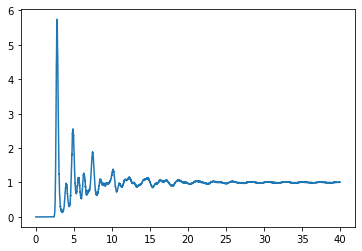

In [3]:
histnum=3000#直方图分割数量(密度)
pdf, r=sys1.calculate_pdf(histnum,cut=40)
#plt.plot(r[0:int(len(r)/2)],pdf[0:int(len(pdf)/2)]);
plt.plot(r,pdf);
#a=np.ones(histnum)#扩展周期
#pdf[int((len(pdf)/2)):]=1 #extend PDF and set tail of PDF to 1 in order to get better resolution in SF
#a[0:len(pdf)]=pdf

#pdf=a
#dr=r[1]-r[0]
#r=np.arange(len(pdf))*dr

Bond Angle Distribution

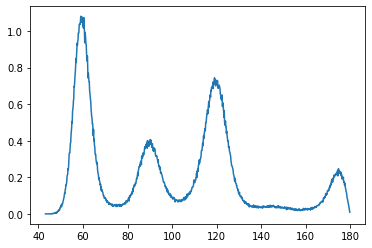

In [6]:
bad, r2=sys1.calculate_bad(1000)
plt.plot(r2*180/np.pi,bad)

Structure Factor-FFT Method

c:\Users\baizh\anaconda3\lib\site-packages\pyscal-2.10.15-py3.9-win-amd64.egg\pyscal\core.py:333: RuntimeWarning: invalid value encountered in true_divide
  sf=(1-2*self.rho*T*T/N*np.imag(fft(r*(pdf-1)))/k)


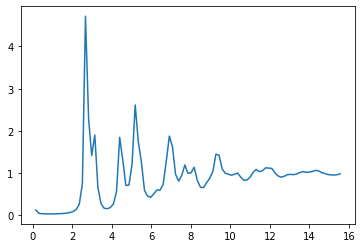

In [7]:
sf,q=sys1.calculate_sf(pdf, r,0);
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);


Structure Factor-Integration Method

c:\Users\baizh\anaconda3\lib\site-packages\pyscal-2.10.15-py3.9-win-amd64.egg\pyscal\core.py:346: RuntimeWarning: divide by zero encountered in true_divide
  sf=1+4*np.pi*self.rho/q*(np.sin(q.dot(r.T)).dot(r*(pdf-1))*dr)
c:\Users\baizh\anaconda3\lib\site-packages\pyscal-2.10.15-py3.9-win-amd64.egg\pyscal\core.py:346: RuntimeWarning: invalid value encountered in multiply
  sf=1+4*np.pi*self.rho/q*(np.sin(q.dot(r.T)).dot(r*(pdf-1))*dr)


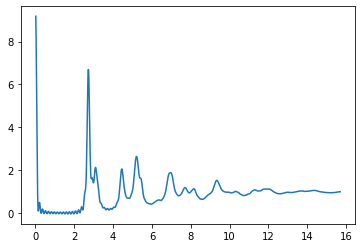

In [9]:
sf,q=sys1.calculate_sf(pdf, r,10);
plt.plot(q[0:int(len(q)/20/histnum*2000)],sf[0:int(len(sf)/20/histnum*2000)]);

保存Q值、概率分布值

In [8]:
#pickle.dump(qs,open('qs.pkl','wb'))
#pickle.dump(qssd,open('qssd.pkl','wb'))

处理Q值，形成概率分布数据

In [2]:
qss=[];
maxs=[];
mins=[];
for i in range(0,4):
    qss.append(qs[:,i,:])
    maxs.append(qss[i].max())
    mins.append(qss[i].min())

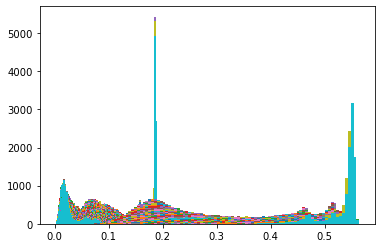

In [3]:
qssd=[];
for j in range(0,4):
    qssd.append([plt.hist(qss[j][i,:],bins=histnum,range=(mins[j],maxs[j]))[0] for i in range(0,framenum)])
qssd=np.array(qssd)

In [19]:
for j in range(0,4):
    qssd[j,:,:]=qssd[j,:,:]/atomnum/(maxs[j]-mins[j])*histnum


对分布函数归一化处理（optional

In [5]:
for j in range(0,4):
    qssd[j,:,:]=qssd[j,:,:]/qssd[j,:,:].max()


画等高线图

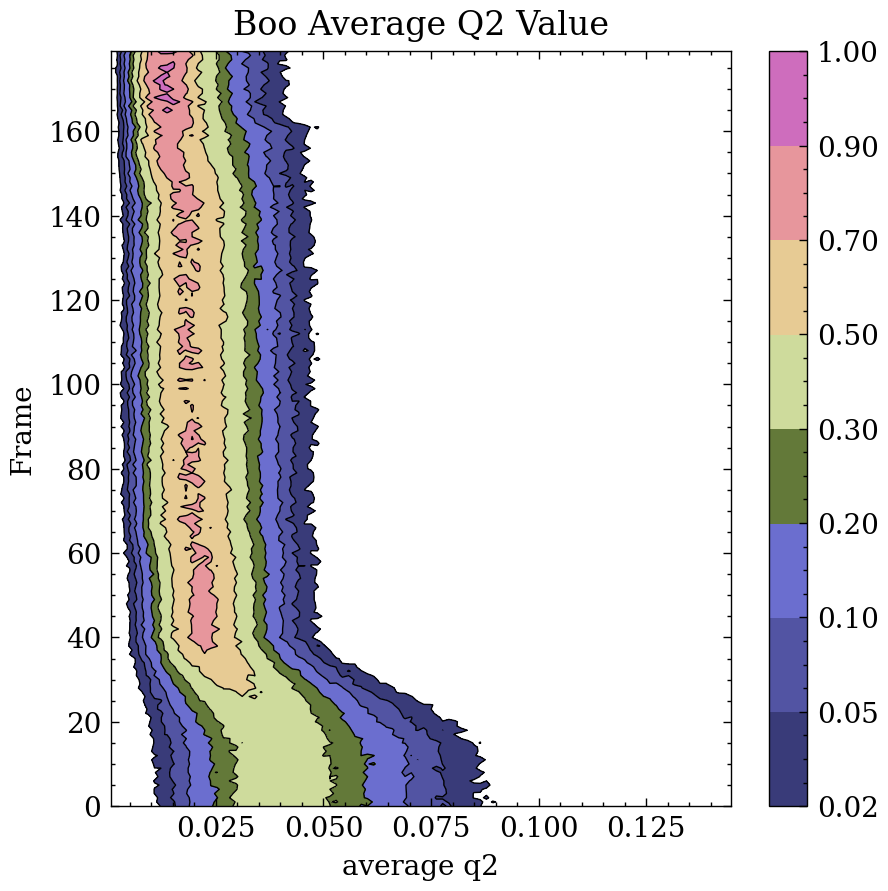

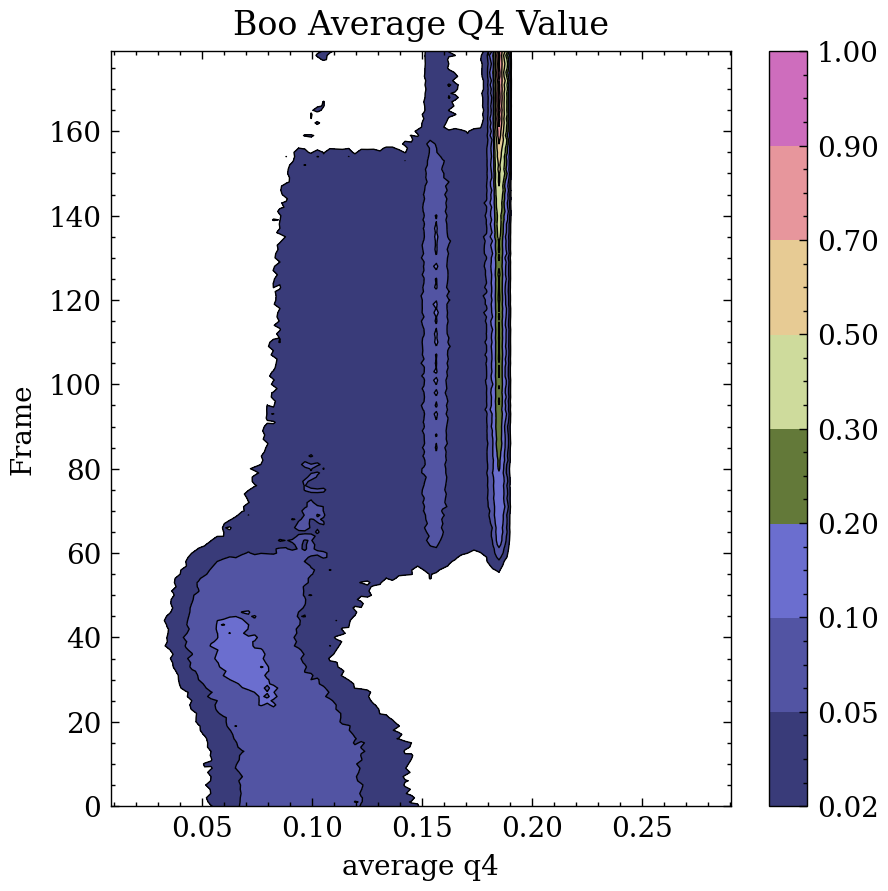

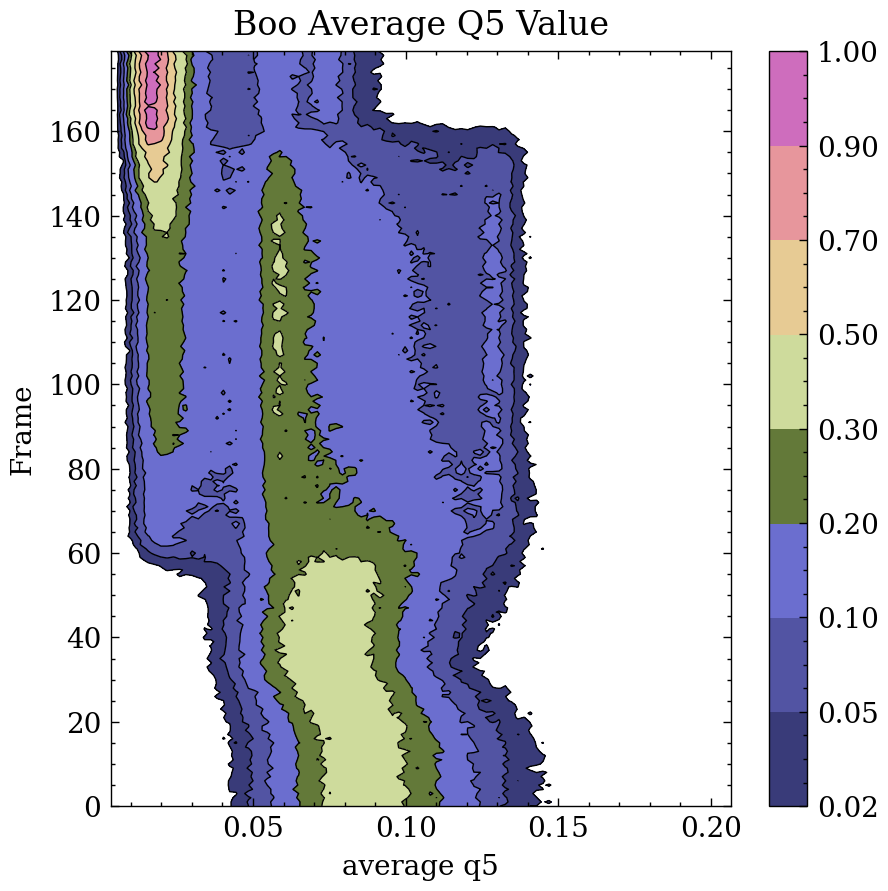

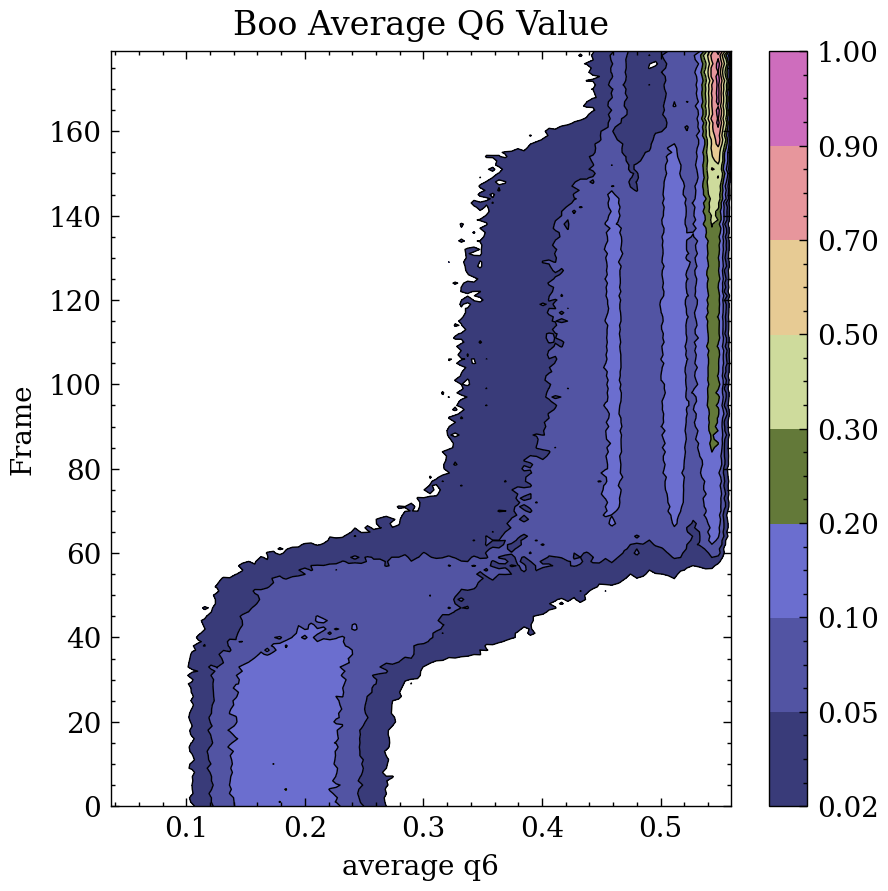

In [7]:
plt.style.use(['science','no-latex'])
qvalue=[2,4,5,6]
for j in range(0,4):
    f,ax=plt.subplots(figsize=(5,5),dpi=200)
    x=np.linspace(mins[j],maxs[j],histnum,endpoint=False)
    y=np.arange(0,180)
    X,Y=np.meshgrid(x,y)

    m=ax.contourf(X,Y,qssd[j],[0.02,0.05,0.1,0.2,0.3,0.5,0.7,0.9,1],cmap='tab20b')#
    ax.contour(X,Y,qssd[j],[0.02,0.05,0.1,0.2,0.3,0.5,0.7,0.9,1],colors='black',linewidths=0.5)
    
    plt.colorbar(m,ax=ax)
    plt.title('Boo Average Q'+str(qvalue[j])+' Value')
    plt.ylabel('Frame')
    plt.xlabel('average q'+str(qvalue[j]))
    plt.savefig('boo'+str(j)+'.png')    
    



对某帧单独分析

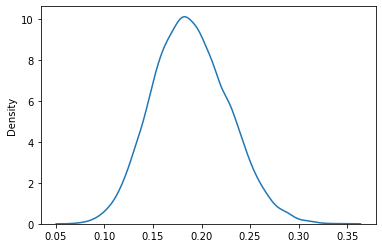

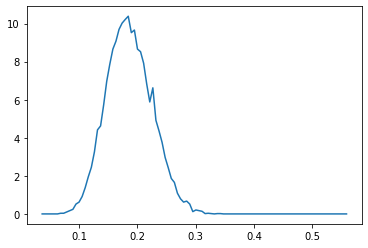

In [30]:
import seaborn as sns
sns.kdeplot(qss[3][0])
fig,ax=plt.subplots();
ax.plot(np.linspace(mins[3],maxs[3],histnum,endpoint=False),qssd[3][0])